In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Arial'
num_test_cells = 8487

vanilla loss
SP loss - hybrid loss (supervised loss + reinfrcementy loss)

prediction accuracy (vanilla, sp, hrl, ho)
inference speed (vanilla, sp, hrl, ho)

table: best hparams


In [2]:
metrics = pd.DataFrame({"F1": [0.7037793397903442, 0.6439070701599121, 0.6726100444793701, 0.7204700708389282],
                        "Accuracy": [0.7800164818763733, 0.7116766571998596, 0.7691763639450073, 0.7809591293334961],
                        "Latency": [45, 59, 37, 38]}, 
                        index=["Vanilla transformer", "Skipformer+SP", "Skipformer+SP+HRL", "Skipformer+SP+HRL-HO"])
metrics["Speed"] = num_test_cells / metrics["Latency"]
metrics

,F1,Accuracy,Latency,Speed
Vanilla transformer,0.703779,0.780016,45,188.600000
Skipformer+SP,0.643907,0.711677,59,143.847458
Skipformer+SP+HRL,0.672610,0.769176,37,229.378378
Skipformer+SP+HRL-HO,0.720470,0.780959,38,223.342105


In [3]:
vanilla_train_loss = pd.read_csv("metrics/vanilla_train_loss_epoch.csv")
sp_train_loss = pd.read_csv("metrics/sp_train_loss_epoch.csv")
hrl_loss_hybrid = pd.read_csv("metrics/hrl_loss_hybrid.csv").rename({"Value": "Hybrid loss"}, axis="columns")
hrl_loss_policy = pd.read_csv("metrics/hrl_loss_policy.csv").rename({"Value": "Reinforcement learning loss"}, axis="columns")
hrl_loss_sp = pd.read_csv("metrics/hrl_loss_sp.csv").rename({"Value": "Supervised learning loss"}, axis="columns")
hrl_loss = pd.concat((hrl_loss_policy["Reinforcement learning loss"], hrl_loss_sp["Supervised learning loss"]), axis=1)

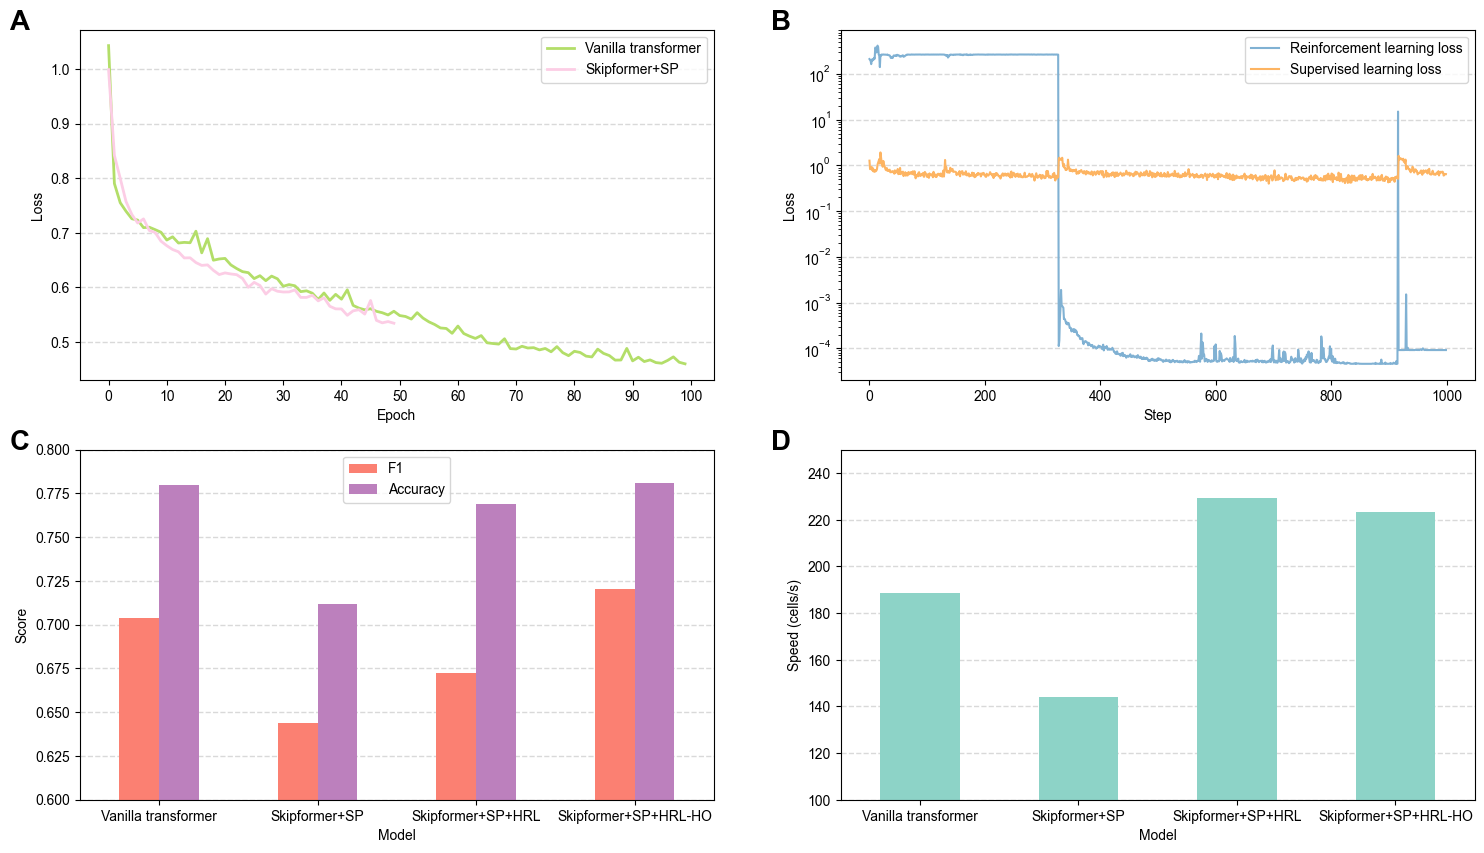

In [4]:
# fig, axs = plt.subplots(2, 2, sharex=False, figsize=(18, 10))
fig, axs = plt.subplot_mosaic("AB;CD", figsize=(18, 10))

vanilla_train_loss["Value"].plot.line(ax=axs['A'], color="#b3de69", label="Vanilla transformer", linewidth=2, xlabel="Epoch", ylabel="Loss")
hrl_loss.plot.line(logy=True, ax=axs['B'], color=["#80b1d3", "#fdb462"], xlabel="Step", ylabel="Loss")
sp_train_loss["Value"].plot.line(ax=axs['A'], color="#fccde5", label="Skipformer+SP", linewidth=2)
metrics[["F1", "Accuracy"]].plot.bar(ylim=(0.6, 0.8), rot=0, ax=axs['C'], xlabel="Model", ylabel="Score", color=["#fb8072", "#bc80bd"])
metrics["Speed"].plot.bar(ylim=(100, 250), ax=axs['D'], xlabel="Model", ylabel="Speed (cells/s)", color="#8dd3c7", rot=0)

axs['A'].legend()
axs['A'].set(xticks=np.arange(0, 110, 10))
for idx, ax in axs.items():
    ax.set_axisbelow(True)
    ax.grid(color='#d9d9d9', linestyle='--', linewidth=1, axis='y')
    ax.text(-0.11, 1., idx, transform=ax.transAxes, size=20, weight='bold')

plt.savefig("figures/metrics.png", dpi=300, bbox_inches="tight")